### L_23 Direction of Gradient
##### my output image when run online:
<img src='l23-my-output-of-dir-threshold.png' />
#### My Solution

In [1]:
%matplotlib inline

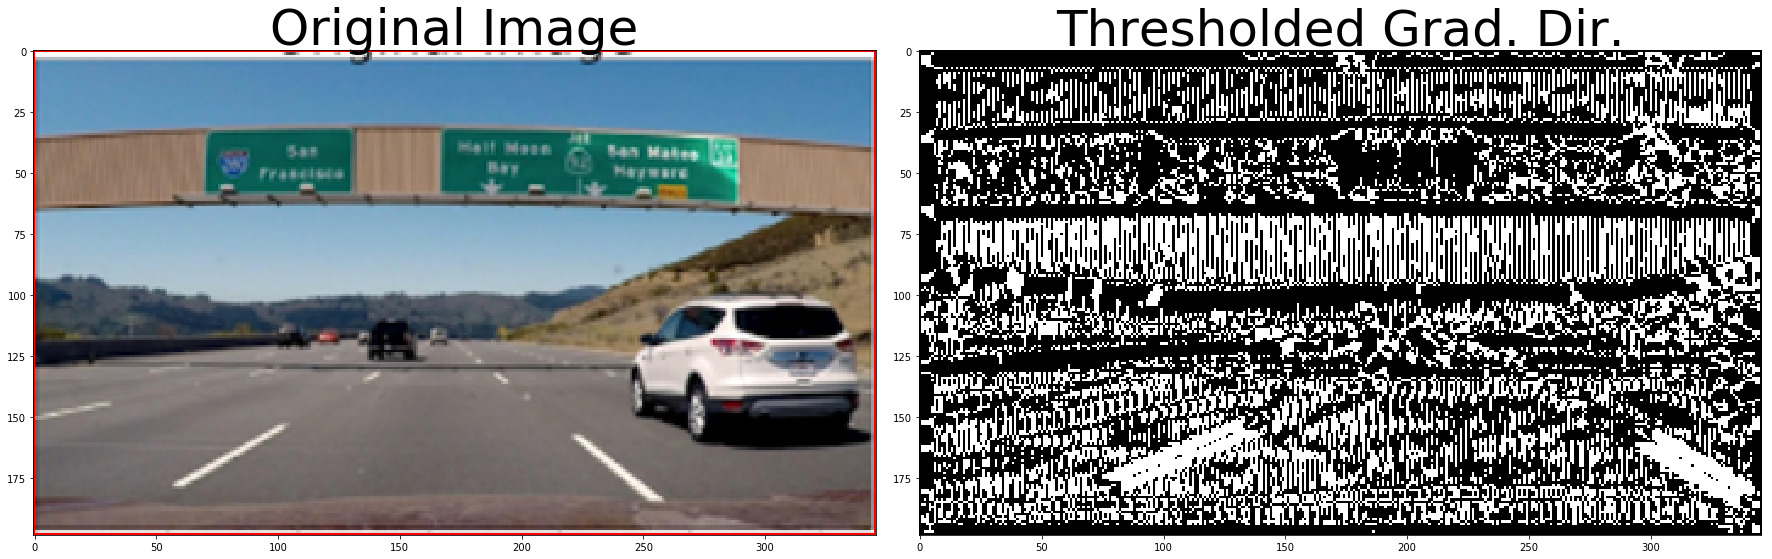

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    # 3) Take the absolute value of the x and y gradients
    # abs = np.sqrt(np.square(sobelx)+np.square(sobely))
    absx = np.absolute(sobelx)
    absy = np.absolute(sobely)
    
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient
    direction = np.arctan2(absy, absx)

    # 5) Create a binary mask where direction thresholds are met
    binary_output = np.zeros_like(gray)
    binary_output[ ((direction >= thresh[0]) & (direction <= thresh[1])) ] = 1
    
    # 6) Return this mask as your binary_output image
    # binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#### This is my output file when run online:  
<img src='l23-my-output-of-dir-threshold.png' />

In [3]:
#### Read Me - Instructions

#### Direction of the Gradient  
When you play around with the thresholding for the gradient magnitude in the previous exercise, you find what you might expect, namely, that it picks up the lane lines well, but with a lot of other stuff detected too. Gradient magnitude is at the heart of Canny edge detection, and is why Canny works well for picking up all edges.  

In the case of lane lines, we're interested only in edges of a particular orientation. So now we will explore the direction, or orientation, of the gradient.  

The direction of the gradient is simply the inverse tangent (arctangent) of the y gradient divided by the x gradient:  

`arctan(sobely/sobelx)`
 

Each pixel of the resulting image contains a value for the angle of the gradient away from horizontal in units of radians, covering a range of `−π/2` to `π/2`. An orientation of 0 implies a horizontal line and orientations of **`+/−π/2`** imply **vertical** lines.  

In this next exercise, you'll write a function to compute the direction of the gradient and apply a threshold. The direction of the gradient is much noisier than the gradient magnitude, but you should find that you can pick out particular features by orientation.  

Steps to take in this exercise:  
  - Fill out the function in the editor below to return a thresholded absolute value of the gradient direction. Use Boolean operators, again with exclusive (<, >) or inclusive (<=, >=) thresholds.  
  - Test that your function returns output similar to the example below for `sobel_kernel=15`, `thresh=(0.7, 1.3)`.  
<img src='l23-thresh-grad-dir-example.jpg' />


#### Start File

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle


# Read in an image
image = mpimg.imread('signs_vehicles_xygrad.png')

# Define a function that applies Sobel x and y, 
# then computes the direction of the gradient
# and applies a threshold.
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    binary_output = np.copy(img) # Remove this line
    return binary_output
    
# Run the function
dir_binary = dir_threshold(image, sobel_kernel=15, thresh=(0.7, 1.3))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(dir_binary, cmap='gray')
ax2.set_title('Thresholded Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)